In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#Load the cleaned dataset
df = pd.read_excel("Copy of healthcare-stroke-data-Allcleaned.xlsx")

In [28]:

# Display first few rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,31112,Male,78,0,1,Yes,Private,Rural,105.920,32.500000,never smoked,1
1,53882,Male,74,1,1,Yes,Private,Rural,70.090,27.400000,never smoked,1
2,10434,Female,69,0,0,No,Private,Urban,94.390,22.800000,never smoked,1
3,27419,Female,59,0,0,Yes,Private,Rural,76.150,28.893237,Unknown,1
4,60491,Female,78,0,0,Yes,Private,Urban,60.134,24.200000,Unknown,1


In [31]:
# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4383 non-null   int64  
 1   gender             4383 non-null   object 
 2   age                4383 non-null   int64  
 3   hypertension       4383 non-null   int64  
 4   heart_disease      4383 non-null   int64  
 5   ever_married       4383 non-null   object 
 6   work_type          4383 non-null   object 
 7   Residence_type     4383 non-null   object 
 8   avg_glucose_level  4383 non-null   float64
 9   bmi                4383 non-null   float64
 10  smoking_status     4383 non-null   object 
 11  stroke             4383 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 411.0+ KB


In [33]:
# View categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


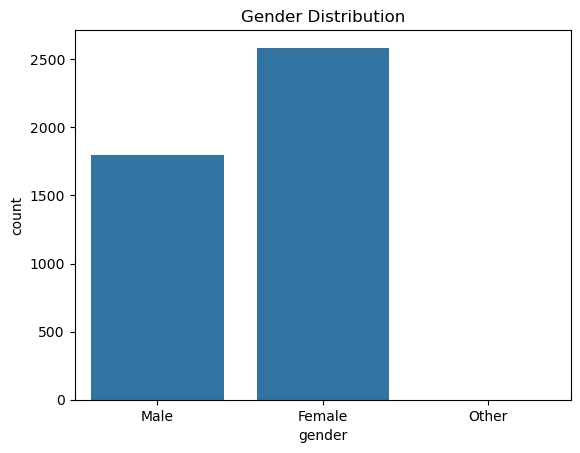

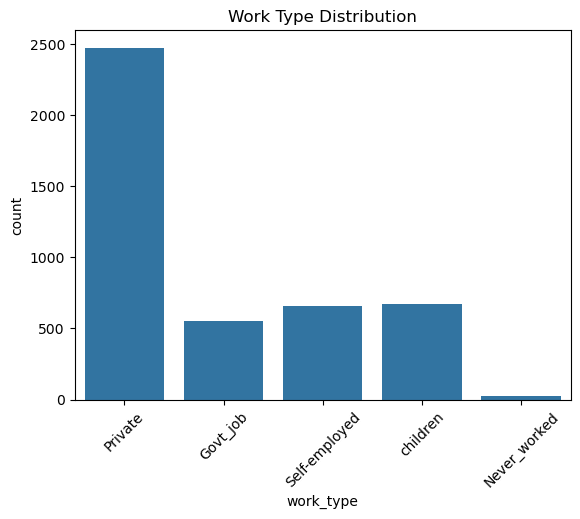

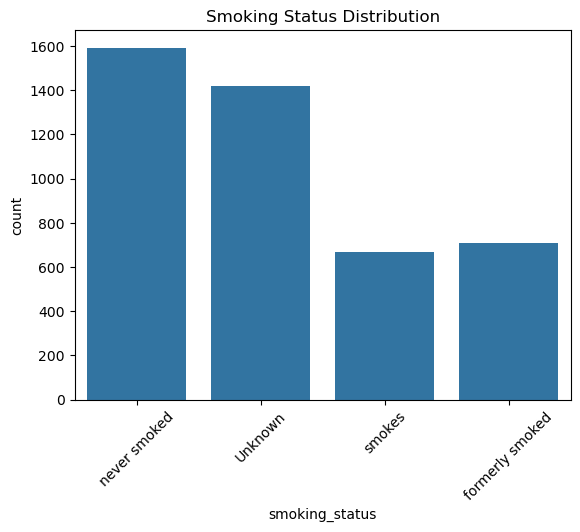

In [35]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Local path to save plots
save_path = r"C:\Users\ASUS\Documents\EDA_Plots"
os.makedirs(save_path, exist_ok=True)

#Gender distribution
sns.countplot(x="gender", data=df)
plt.title("Gender Distribution")
plt.savefig(os.path.join(save_path, "gender_distribution.png"), bbox_inches='tight')
plt.show()

#Work Type distribution
sns.countplot(x="work_type", data=df)
plt.title("Work Type Distribution")
plt.xticks(rotation=45)
plt.savefig(os.path.join(save_path, "work_type_distribution.png"), bbox_inches='tight')
plt.show()

#Smoking status distribution
sns.countplot(x="smoking_status", data=df)
plt.title("Smoking Status Distribution")
plt.xticks(rotation=45)
plt.savefig(os.path.join(save_path, "smoking_status_distribution.png"), bbox_inches='tight')
plt.show()


In [37]:
import os
os.getcwd()


'C:\\Users\\ASUS'

In [39]:
from sklearn.preprocessing import LabelEncoder


In [41]:
# Make a copy to avoid overwriting original
df_encoded = df.copy()


In [43]:
# 1. Label Encoding for binary columns
binary_cols = ["gender", "ever_married", "Residence_type"]

le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [45]:
# 2. One-Hot Encoding for multi-class columns
multi_class_cols = ["work_type", "smoking_status"]

df_encoded = pd.get_dummies(df_encoded, columns=multi_class_cols, drop_first=True)


In [47]:
# Check encoded dataset
df_encoded.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,31112,1,78,0,1,1,0,105.920,32.500000,1,False,True,False,False,False,True,False
1,53882,1,74,1,1,1,0,70.090,27.400000,1,False,True,False,False,False,True,False
2,10434,0,69,0,0,0,1,94.390,22.800000,1,False,True,False,False,False,True,False
3,27419,0,59,0,0,1,0,76.150,28.893237,1,False,True,False,False,False,False,False
4,60491,0,78,0,0,1,1,60.134,24.200000,1,False,True,False,False,False,False,False


In [49]:
print("Before Encoding Shape:", df.shape)
print("After Encoding Shape:", df_encoded.shape)


Before Encoding Shape: (4383, 12)
After Encoding Shape: (4383, 17)


In [51]:
import os

# Create outputs folder in the current directory
os.makedirs("outputs", exist_ok=True)

# Save the encoded dataset
df_encoded.to_csv("outputs/encoded_dataset.csv", index=False)
